# This notebook creates various plots

Specify the results directory where the trace signals have been saved. Load files from this directory.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from collections import defaultdict
import pickle
# import important experimental variables
from experiment_info import samples, data_dir, puffs, params
# import custom functions
import functions as fn

results_dir = 'results'
mean_activity_within_segment = pd.read_csv(f'{results_dir}/mean_activity_within_segment.csv')

with open(f'{results_dir}/binary_masks.pkl', 'rb') as f:
    binary_masks = pickle.load(f)

## Plot activity traces

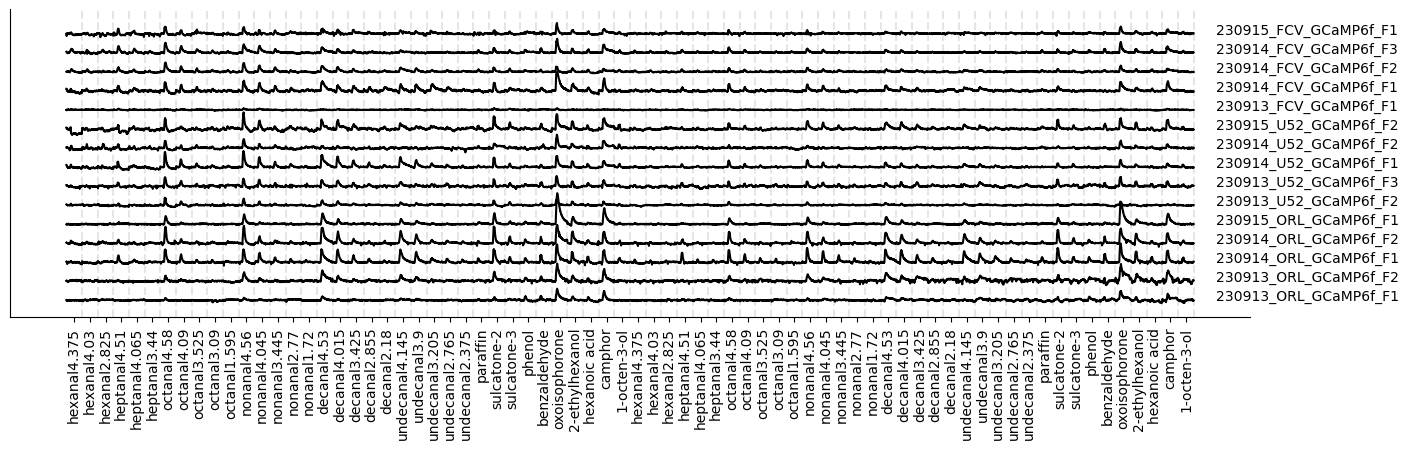

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(16, 4))

for i,samp in enumerate(mean_activity_within_segment):    
    plt.plot(mean_activity_within_segment[samp] + i*0.02, c='black')  # Offset each trace by i*3
    # print sample name on the right
    plt.text(len(mean_activity_within_segment[samp])*1.02, i*0.02, samp, color='black')

# print the names of the odors on the x-axis
odor_names = []
positions = []
for i,puff in enumerate(puffs):
    odor_names.append(puff.odor_name)
    positions.append(i*params['n_frames_to_analyze'] + params['n_frames_to_analyze']/2)
plt.xticks(positions, odor_names, rotation=90)

# draw vertical lines to separate odors
for i in range(len(puffs)):
    plt.axvline((i+1)*params['n_frames_to_analyze'], color="black", linestyle="--", alpha=0.1)

plt.yticks([])
# supress grid lines
plt.grid(False)
sns.despine()

# plt.savefig(f'{results_dir}/signal_traces.png', dpi=300)
# plt.close()


230914_ORL_GCaMP6f_F2


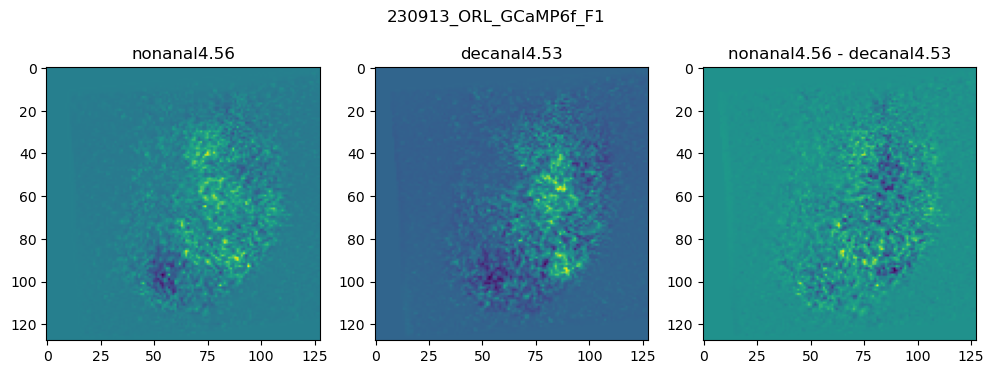

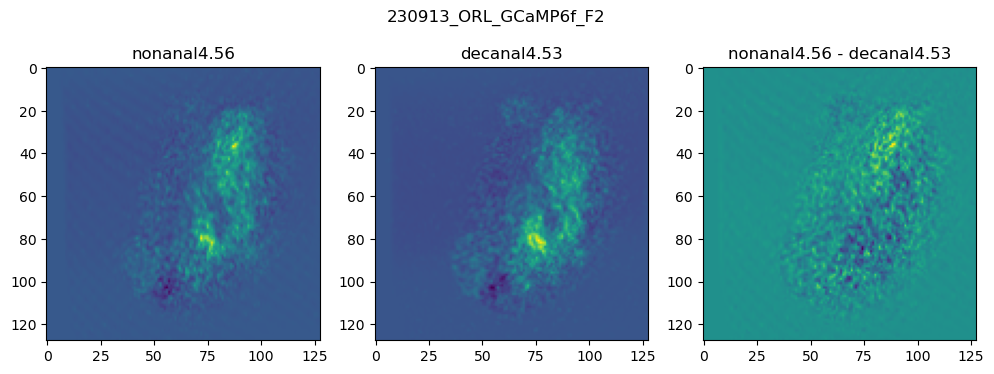

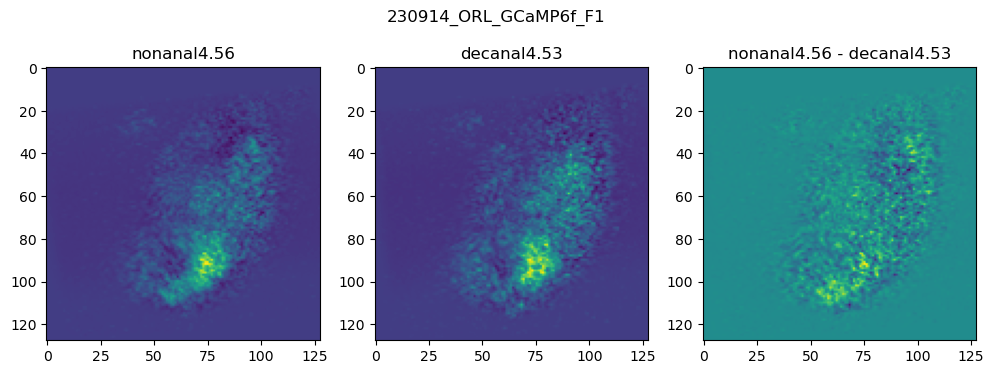

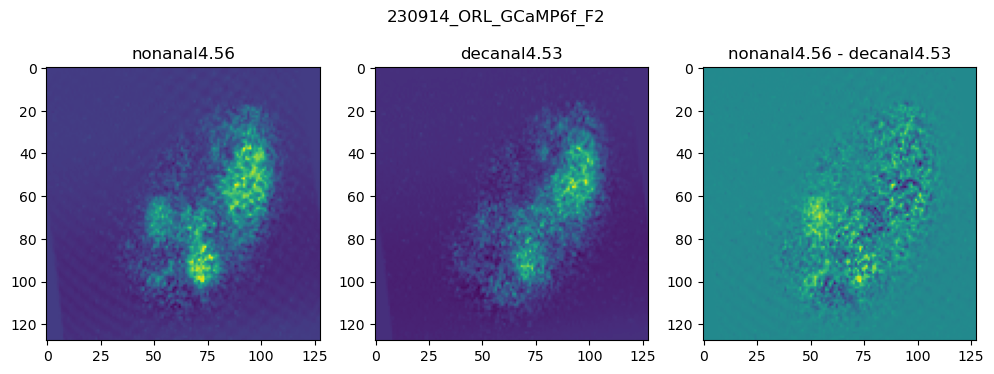

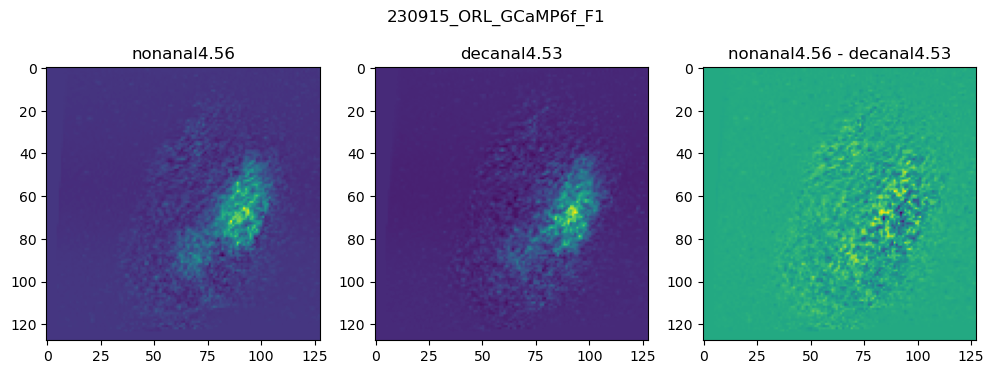

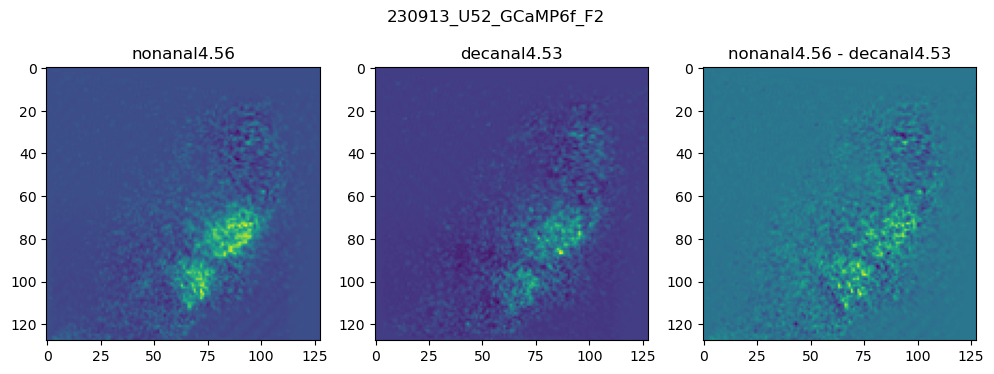

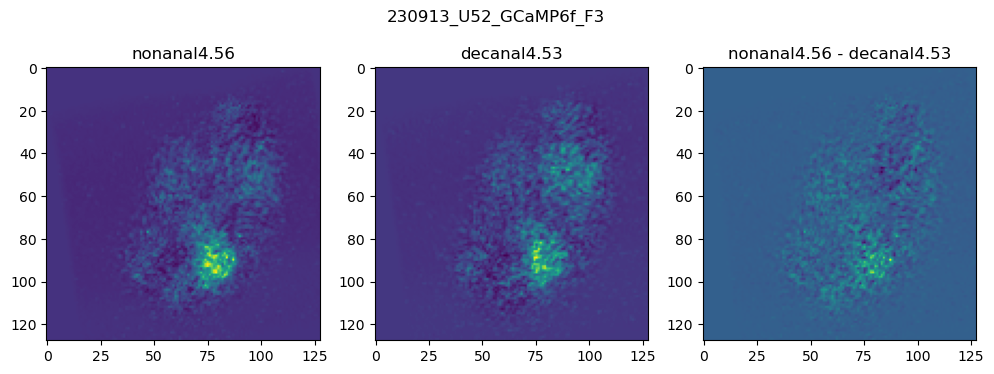

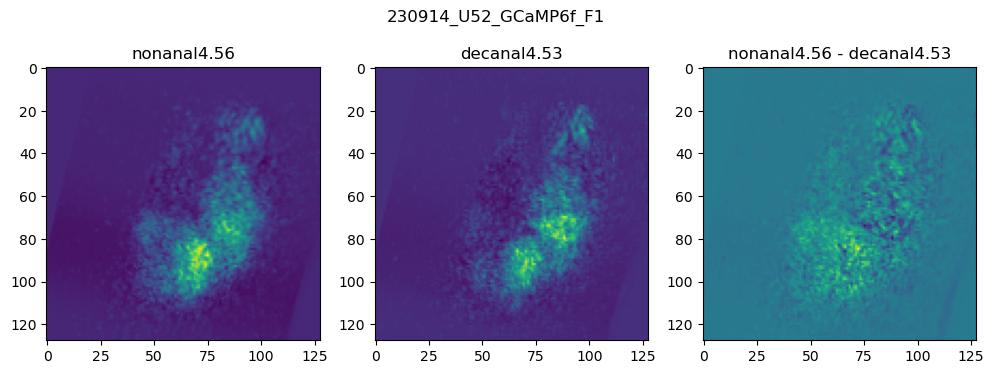

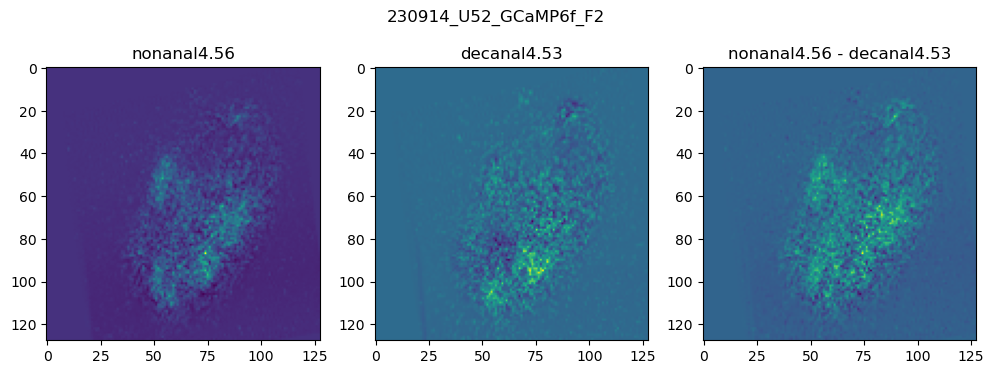

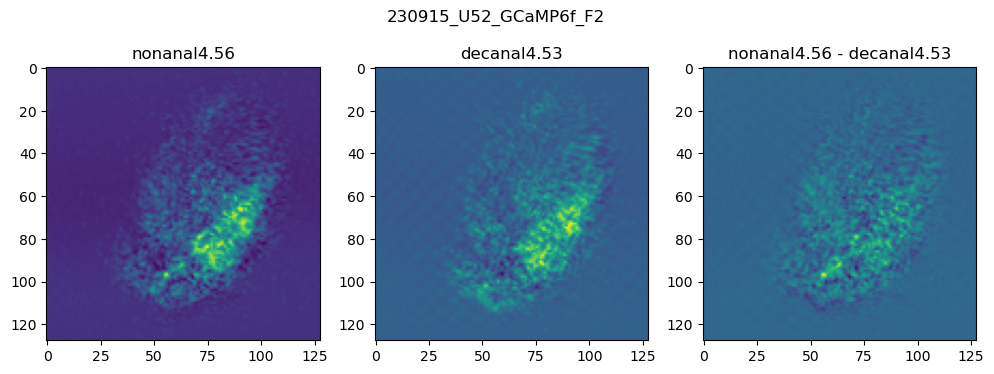

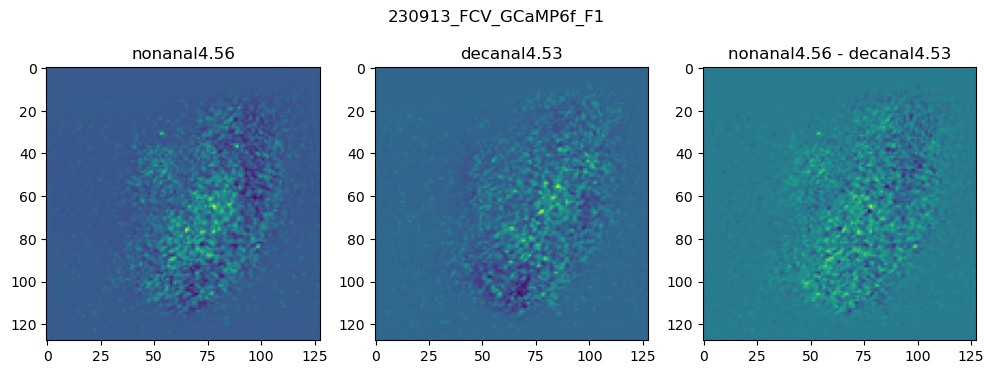

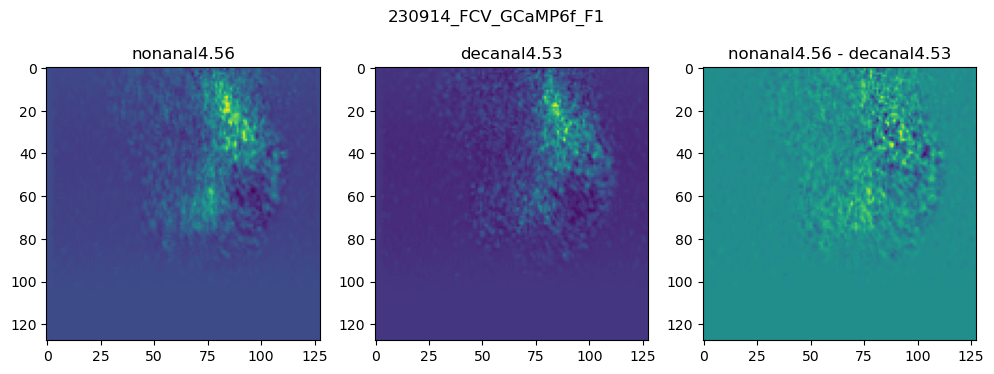

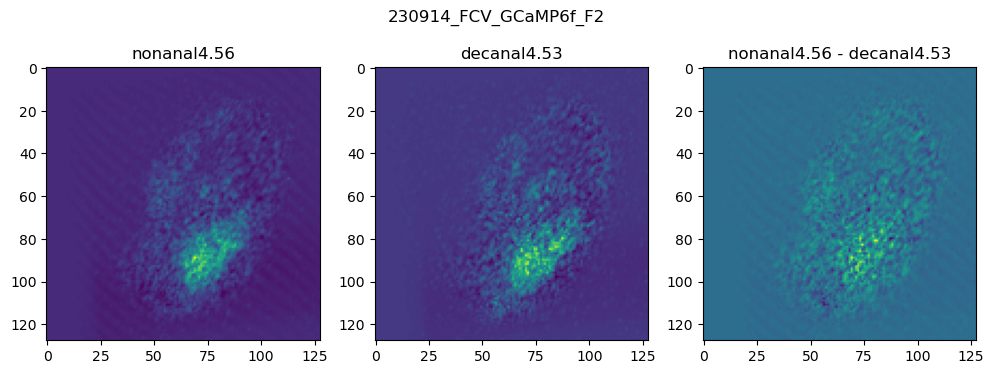

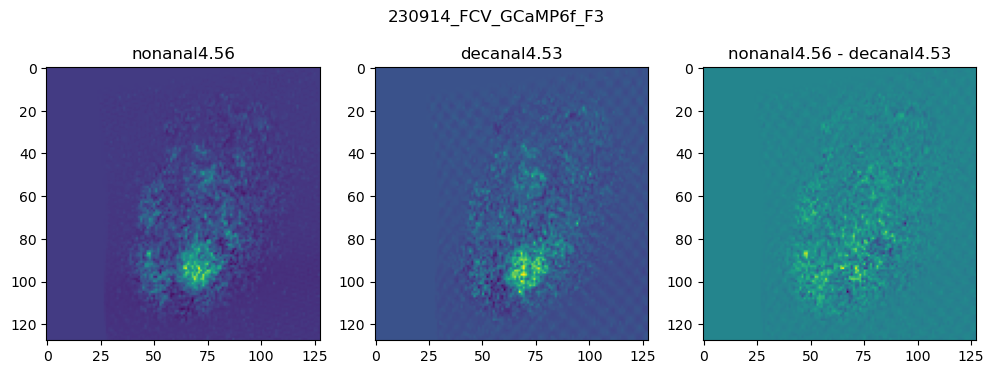

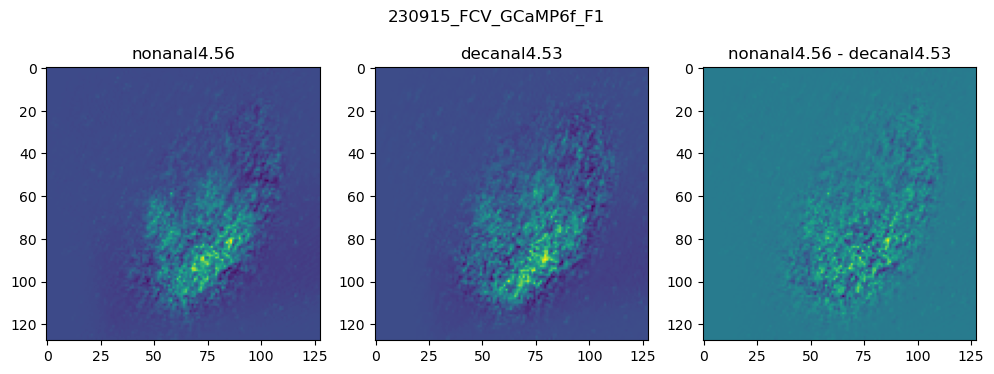

In [6]:
results_dir = "results/images_at_max_intensity_per_odor"
odor_pair_of_interest = ['nonanal4.56', 'decanal4.53']

def read_pikl(file_name):
    with open(file_name, 'rb') as f:
        data = pickle.load(f)
    return data

# for samp in samples:
samp = samples[3]
print(samp)
for samp in samples:
    vols = [read_pikl(f'{results_dir}/{samp}/{i}.pkl') for i in odor_pair_of_interest]
    vol1 = read_pikl(f'{results_dir}/{samp}/{odor_pair_of_interest[0]}.pkl')
    vol2 = read_pikl(f'{results_dir}/{samp}/{odor_pair_of_interest[1]}.pkl')

    projection1, projection2 = np.mean(vol1, axis=2), np.mean(vol2, axis=2)
    projection3 = projection1 - projection2

    fig, axs = plt.subplots(1,3, figsize=(12,4))
    cmap='viridis'
    # sns.heatmap(projection1, ax=axs[0], cmap=cmap)
    # sns.heatmap(projection2, ax=axs[1], cmap=cmap)
    # sns.heatmap(projection3, ax=axs[2], cmap=cmap)
    axs[0].imshow(projection1, cmap=cmap)
    axs[1].imshow(projection2, cmap=cmap)
    axs[2].imshow(projection3, cmap=cmap)
    # create a title for the figure for each smaple
    fig.suptitle(f'{samp}')
    # label each subplot by odor
    axs[0].set_title(f'{odor_pair_of_interest[0]}')
    axs[1].set_title(f'{odor_pair_of_interest[1]}')
    axs[2].set_title(f'{odor_pair_of_interest[0]} - {odor_pair_of_interest[1]}')
    # print(np.mean(projection1), np.min(projection1), np.max(projection1))
    # print(np.mean(projection2), np.min(projection2), np.max(projection2))
    # print(np.mean(projection3), np.min(projection3), np.max(projection3))

